![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)

# Working With Open Data: Car Mileage Data Part 2

This notebook  will use the same car mileage data set as in part one, but this time we will be demonstrating power of data aggregation. We will be introducing  pivot tables in Pandas, and exploring different aggregation functions. First lets reimport the libraries we need into this notebook, and download the data again. 

In [2]:
# This is the same as the previous notebook! We're just importing the data again
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
url = 'https://data.opendatasoft.com/explore/dataset/us-vehicle-fuel-economy-data-1984-2017@kapsarc/download/?format=csv&timezone=America/Denver&use_labels_for_header=true'
car_data = pd.read_csv(url, sep=';')


# Aggregating Data For More Informative Plots

The car mileage data contains a temporal column (`year`). It is often enlightening to observe changes as a function of time. Unfortunately, this data is not currently organized in a way which makes plotting our data as a function of time immediately obvious. Using pandas we can use a pivot table to summarise and aggregate data quickly and easily. If you've used a pivot table in Excel before, the concept in pandas is identical.  Pivot tables are used and manipulated a little different within pandas. Let's work through a few examples and see if we can find anything more interesting within the data set using  a pivot table. 

## Making a Pivot table

To make a pivot table, we don't need to do anything much more complicated than what we've already seen. We won't have to do any extra work or write hundreds of lines of code. As you'll find with most things you want to do in Python and Pandas: there's already a function that does exactly what you want. In the cell below we define create pivot table from our `car_data` dataframe using the aptly named `pivot_table` pandas function.

In [3]:
'''
Here we're taking our car data data frame and aggregating it by year, below we explain what each argument does

1. car_data          : Here we're simply passing our source data frame into the piviot table

2. index = 'year'    : Here we're setting the index of our new piviot table. In essence this can be though of 
                       as both the 'index' i.e. what value labels each row uniquely, as well as the 'grouping'
                       term. In this case, we'll see each row labeled by year, and each data point will be 
                       aggregated by which unique year it appeard under

3. aggfunc = 'count' : This is our aggregation function. In this case we're simply choosing to count how many
                       entries happen each year. However, there is no reason that we coudn't aggregate by other
                       quantites such as the mean, median, mode, standard deviation and so on instead. 
                       
4. Special Note      : You may have also noticed that we're not explicitly mentioning what to do with those 'NaN'
                       values we noticed earlier. That is becasue our piviot table will automatically ignore any 
                       NaN values during the aggregation so we don't even have to think about it. Convenient!

'''

pd.pivot_table(car_data, 
                index = 'year',
                aggfunc = 'count')

,UCity,UCityA,UHighway,UHighwayA,VClass,atvType,barrels08,barrelsA08,c240Dscr,c240bDscr,...,rangeCity,rangeCityA,rangeHwy,rangeHwyA,sCharger,startStop,tCharger,trans_dscr,trany,youSaveSpend
year,,,,,,,,,,,,,,,,,,,,,
1984,1964,1964,1964,1964,1964,199,1964,1964,0,0,...,1964,1964,1964,1964,0,0,127,54,1962,1964
1985,1701,1701,1701,1701,1701,158,1701,1701,0,0,...,1701,1701,1701,1701,0,0,158,318,1701,1701
1986,1210,1210,1210,1210,1210,71,1210,1210,0,0,...,1210,1210,1210,1210,0,0,105,291,1210,1210
1987,1247,1247,1247,1247,1247,56,1247,1247,0,0,...,1247,1247,1247,1247,0,0,136,292,1247,1247
1988,1130,1130,1130,1130,1130,31,1130,1130,0,0,...,1130,1130,1130,1130,0,0,88,417,1130,1130
1989,1153,1153,1153,1153,1153,33,1153,1153,0,0,...,1153,1153,1153,1153,4,0,113,513,1153,1153
1990,1078,1078,1078,1078,1078,29,1078,1078,0,0,...,1078,1078,1078,1078,4,0,83,511,1078,1078
1991,1132,1132,1132,1132,1132,39,1132,1132,0,0,...,1132,1132,1132,1132,2,0,80,591,1132,1132
1992,1121,1121,1121,1121,1121,23,1121,1121,0,0,...,1121,1121,1121,1121,5,0,69,570,1121,1121



Now that we have a pivot table, let's do something a little more interesting and see how the average fuel economy has changed over the time. We will aggregate (combine) our data by calculating the average (mean) fuel economy for all cars each year. As seen in the cell below, this can be accomplished in a single line of code using a pivot table. 

In [1]:
'''
Notice how this time we're not specifying an 'x' axes; this is because we're interested
in plotting this by year, and as it's our index pandas will automatically use it for the unspecifed 
axes. 
'''

pd.pivot_table(car_data,index='year', 
                        aggfunc = 'mean').plot(y = 'UHighway')

NameError: name 'pd' is not defined

The resulting graphs from aggregation are starting to get more interesting! Around 2008 we start to see a distinct increase in average fuel economies of all vehicles. To get a better picture it is informative to also add some measure of variation to these plots. As we've aggregated by mean, it is prudent to also to include the mean plus and minus the standard deviation in this plot as well. We do  note that mean and standard deviation are  not the best metrics for data like this, as it is likely things are not normally distributed. For demonstration purposes like this, using mean and standard deviation for simplicity and exploration are more than adequate. 

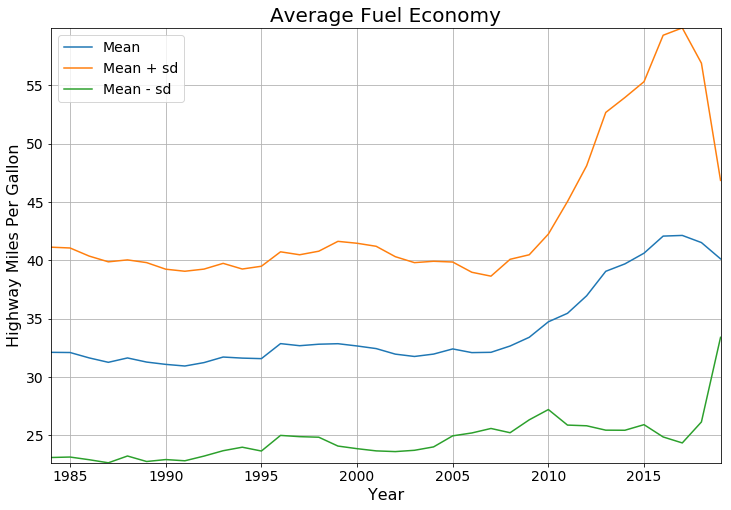

In [10]:
# This time we're giving both our mean and standard deviation names that we can call later
# Unfortunately, we're not very creative so we're simply calling the mean 'a' and standard
# deviation 'b'.

a = pd.pivot_table(car_data,index ='year', 
                   aggfunc = 'mean')

b = pd.pivot_table(car_data,index ='year', 
                   aggfunc = 'std')

# Here we're naming our plot 'ax' for axes 

my_plot = a.plot(y = 'UHighway', label="Mean", figsize = (12,8))


'''
There's a lot going on in the two lines of code below, so let's take a moment to understand them

1. When we type (a + b), we're actually adding our dataframes together element-by-element. This is 
   possible because a and b have identical column names and sizes. When we wrap them in parenthesis,
   the .plot command will see that as a single data frame. We could have also specified something like
       
       Plus_one_sd = a + b
       Plus_one_sd.plot( ... )
    
    However, sometimes it's easier to just do things in a single line. 

2. Also specifying ax=my_plot. This tells Python to place these new traces on the same picture as 
   'my_plot', or the plot of the mean we did in the line before this. 

3. By just doing mean +/- standard deviation, we are assuming symmetric uncertainties, and this may not
   be the case in the actual data. But, for our purposes, it's likely more than adequate. 
'''

(a + b).plot(ax = my_plot, y = 'UHighway', label = "Mean + sd") 
(a - b).plot(ax = my_plot, y= 'UHighway', label = "Mean - sd")

plt.title("Average Fuel Economy", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Highway Miles Per Gallon", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight = True)  
plt.legend(fontsize = 14) # Change font size of legend

As aggregate data and observe the resulting variations, a much more interesting picture begins to emerge.  2010 began an upward trend of better average fuel efficiency which peaked in 2017 before starting to decrease . In 2019 (the most recent data) the standard deviation of the data set shows significant decrease. This implies that there is less variation in the data for 2019 car models. There could be several reasons for both this trend and the 'weirdness' of 2019. Perhaps there are more vehicles with larger engines being made in 2019? Perhaps there's missing data? Or perhaps something entirely different. There are many potential reasons. Let us see if there's a stronger argument than speculation by using some of the skills we've used already (and by introducing one more)

## Deeper Analysis

As we're looking for fuel efficiency, the most telltale sign of a more or less fuel efficient vehicle is the number of cylinders in the engine. An engine with more cylinders will use more gas than an engine with less. In this case, one of the things we can do is to group our data by _both_ year and the number of cylinders. This is done in the code below. 

In [22]:
double_grouping = pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],  # Here we specify that we want to index (group) our data
                                                # by year *and* number of cylinders
                aggfunc = 'count')              # Aggregate by count

double_grouping.head(10)                         # .head(10) wil only display the first 10 rows

UCity  UCityA  UHighway  UHighwayA  VClass  atvType  \
year cylinders                                                        
1984 2.0            6       6         6          6       6        0   
     4.0         1020    1020      1020       1020    1020       79   
     5.0           39      39        39         39      39        2   
     6.0          457     457       457        457     457       23   
     8.0          439     439       439        439     439       95   
     12.0           3       3         3          3       3        0   
1985 2.0            5       5         5          5       5        0   
     3.0            6       6         6          6       6        0   
     4.0          853     853       853        853     853       60   
     5.0           20      20        20         20      20        6   

                barrels08  barrelsA08  c240Dscr  c240bDscr      ...       \
year cylinders                                                  ...        
1984 2.0                6           6         0          0      ...        
     4.0             1020        1020         0          0      ...        
     5.0               39          39         0          0      ...        
     6.0              457         457         0          0      ...        
     8.0              439         439         0          0      ...        
     12.0               3           3         0          0      ...        
1985 2.0                5           5         0          0      ...        
     3.0                6           6         0          0      ...        
     4.0              853         853         0          0      ...        
     5.0               20          20         0          0      ...        

                rangeCity  rangeCityA  rangeHwy  rangeHwyA  sCharger  \
year cylinders                                                         
1984 2.0                6           6         6          6         0   
     4.0             1020        1020      1020       1020         0   
     5.0               39          39        39         39         0   
     6.0              457         457       457        457         0   
     8.0              439         439       439        439         0   
     12.0               3           3         3          3         0   
1985 2.0                5           5         5          5         0   
     3.0                6           6         6          6         0   
     4.0              853         853       853        853         0   
     5.0               20          20        20         20         0   

                startStop  tCharger  trans_dscr  trany  youSaveSpend  
year cylinders                                                        
1984 2.0                0         0           0      6             6  
     4.0                0       107           0   1020          1020  
     5.0                0         6           0     39            39  
     6.0                0        14          17    456           457  
     8.0                0         0          37    438           439  
     12.0               0         0           0      3             3  
1985 2.0                0         0           0      5             5  
     3.0                0         0           0      6             6  
     4.0                0       131         225    853           853  
     5.0                0         9           7     20            20  

[10 rows x 81 columns]

Where we see that we now have two groups: First our data is grouped by year, and then it is grouped by the number of cylinders in the engine. Unfortunately this dataframe is not currently in a form that our plotting library knows how to deal with; we have two column indexes, the number of cylinders and years meaning that our graphing library won't know how to treat the data. Luckily however, we can convert it to a form that the graphing will enjoy more using the `unstack()` function which will 'pivot' our pivot table such that it will be easier to plot. 

In [25]:
'''
Here the unstack() function with no arguments in its parenthesis pivot our pivot table 
into a form that can be more easily plotted.
'''

double_grouping.unstack().head()

UCity                                                  UCityA ...   \
cylinders  2.0   3.0     4.0   5.0    6.0    8.0  10.0 12.0 16.0   2.0  ...    
year                                                                    ...    
1984        6.0   NaN  1020.0  39.0  457.0  439.0  NaN  3.0  NaN    6.0 ...    
1985        5.0   6.0   853.0  20.0  462.0  351.0  NaN  2.0  NaN    5.0 ...    
1986        1.0   9.0   592.0  18.0  323.0  263.0  NaN  3.0  NaN    1.0 ...    
1987        3.0  11.0   625.0  26.0  296.0  282.0  NaN  4.0  NaN    3.0 ...    
1988        3.0  13.0   526.0  17.0  325.0  241.0  NaN  5.0  NaN    3.0 ...    

          trany youSaveSpend                                                   
cylinders  16.0         2.0   3.0     4.0   5.0    6.0    8.0  10.0 12.0 16.0  
year                                                                           
1984        NaN          6.0   NaN  1020.0  39.0  457.0  439.0  NaN  3.0  NaN  
1985        NaN          5.0   6.0   853.0  20.0  462.0  351.0  NaN  2.0  NaN  
1986        NaN          1.0   9.0   592.0  18.0  323.0  263.0  NaN  3.0  NaN  
1987        NaN          3.0  11.0   625.0  26.0  296.0  282.0  NaN  4.0  NaN  
1988        NaN          3.0  13.0   526.0  17.0  325.0  241.0  NaN  5.0  NaN  

[5 rows x 729 columns]

Where this is now in a form that we can plot. It might be interesting to first visualize the number of cars produced with various numbers of cylinders per year, which is done below

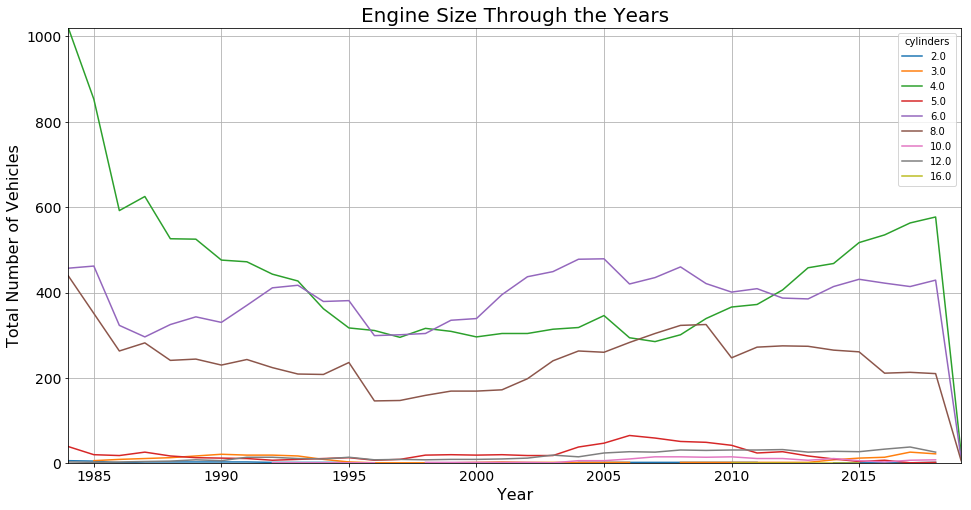

In [7]:
'''
Note we're doing all the previously shown manipulations in one line instead of using the variable we created 
earlier for illustrative purposes. This simply because it's more convenient to work with like this when you're
potentialy changing what values you're sorting/how your aggregating. 
'''

pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],
                aggfunc = 'count').unstack().plot(kind='line', y = "model", figsize = (16,8))

plt.title("Engine Size Through the Years", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Total Number of Vehicles", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight=True)  


Ah ha! So our decreasing standard deviation in 2019 is not in fact not 'real' - it is simply an artifact of a lack of data in 2019. More interestingly, is that starting from 2009, there is a noticeable increase in the number of four cylinder engines. Could this be the reason for the increase in mean highway fuel economy? Let's find out by instead aggregating by the mean for each engine type.

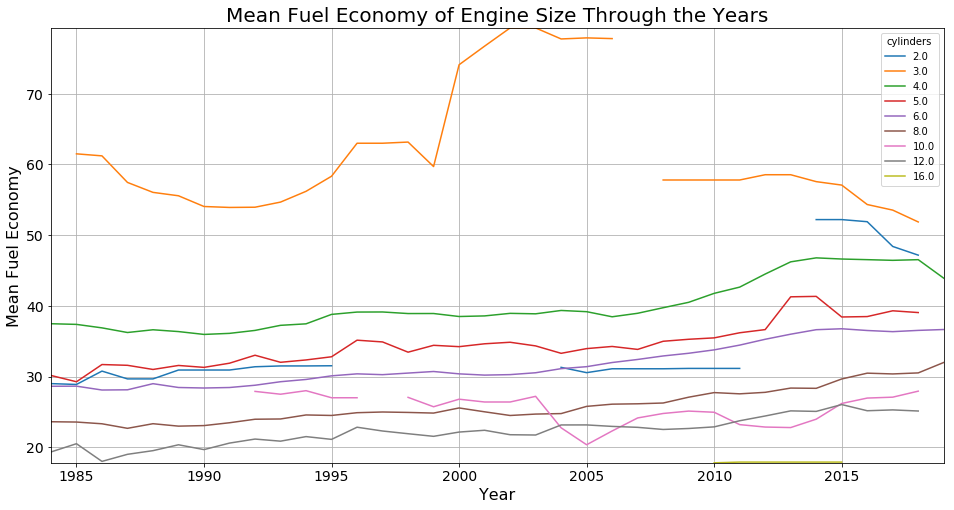

In [8]:
pd.pivot_table(car_data, 
                index = ['year', 'cylinders'],
                aggfunc = 'mean').unstack().plot(kind='line', y = "UHighway", figsize = (16,8))

plt.title("Mean Fuel Economy of Engine Size Through the Years", size = 20)        
plt.xlabel("Year" , size = 16) 
plt.ylabel("Mean Fuel Economy", size = 16)     
plt.xticks(size = 14)                             
plt.yticks(size = 14)                              
plt.grid('on')                                     
plt.autoscale(tight=True)  




Interesting. By comparing the two plots above, it become apparent that while almost every engine type has gotten more fuel efficient on average, these gains in efficiency are minor. Only about 10 MPG. What's more interesting is that there are more four cylinder vehicles being produced since 2010. This is possibly evidence of a shift towards demand for more fuel efficient vehicles. It is possible to quantify which vehicles are contributing most to this gain in fuel efficiency. That analysis requires normalization of the data, and is left for another time. Regardless, using the skills you've already learned in this notebook  filtering  and aggregating data tables a within a pivot table, you could start your own analysis comparing which car manufacturers are creating the most fuel efficient vehicles. Or, you could explore any aspect you find interesting. 

# Conclusion

In this notebook we walked through a few more 'advanced' examples of how to work with large open data sets like this. We used the power of pivot tables to aggregate our data by both counts and mean. We showed you some powerful tools at your disposal to explore vast amounts of data to start to draw conclusions from the data set. The skills you have learned here can be translated to other projects where aggregation of the data may prove to be invaluable.

![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)